In [427]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns #Seaborn is a Python data visualization library based on matplotlib
import missingno as msno #Missing data visualization module for Python
import datetime as dt

In [428]:
df_product=pd.read_csv('7817_1.csv')

In [429]:
df_product.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'dateAdded',
       'dateUpdated', 'dimension', 'ean', 'keys', 'manufacturer',
       'manufacturerNumber', 'name', 'prices', 'reviews.date',
       'reviews.doRecommend', 'reviews.numHelpful', 'reviews.rating',
       'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'sizes',
       'upc', 'weight'],
      dtype='object')

- 'id' : l'identifiant unique du produit    
- 'asins' : les identifiants uniques du produit attribués par les d
- 'brand' : la marque du produit
- 'categories' : les catégories de produits auxquelles le produit appartient
- 'colors' : les couleurs disponibles pour le produit
- 'dateAdded' : la date à laquelle le produit a été ajouté au catalogue
- 'dateUpdated' : la date à laquelle les informations sur le produit ont été mises à jour pour la dernière fois
- 'dimension' : les dimensions du produit
- 'ean' : le code EAN (European Article Number) du produit
- 'keys' : les mots clés associés au produit
- 'manufacturer' : le fabricant du produit
- 'manufacturerNumber' : le numéro de modèle du produit attribué par le fabricant
- 'name' : le nom du produit
- 'prices' : les prix du produit
- 'reviews.date' : la date à laquelle la revue a été publiée
- 'reviews.doRecommend' : indique si l'auteur de la revue recommande le produit ou non
- 'reviews.numHelpful' : le nombre de personnes qui ont trouvé la revue utile
- 'reviews.rating' : la note attribuée au produit par l'auteur de la revue
- 'reviews.sourceURLs' : l'URL de la page où la revue a été publiée
- 'reviews.text' : le texte de la revue
- 'reviews.title' : le titre de la revue
- 'reviews.userCity' : la ville de l'auteur de la revue
- 'reviews.userProvince' : la province de l'auteur de la revue
- 'reviews.username' : le nom d'utilisateur de l'auteur de la revue
- 'sizes' : les tailles disponibles pour le produit
- 'upc' : le code UPC (Universal Product Code) du produit
- 'weight' : le poids du produit

In [431]:
df_product.head()

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams


nettoyage  des donnees

suppression les fonctionnalités  inutiles Par exemple: 'id', 'asins', 'dateAdded', 'dateUpdated', 'ean', 'keys', 'manufacturer', 'manufacturerNumber', 'reviews.sourceURLs', 'reviews.userCity' et 'reviews.userProvince' des fonctionnalités qui ne sont pas pertinentes pour notre analyse.

In [432]:
# Supprimer les fonctionnalités inutiles
cols_to_drop = [ 'id','asins', 'dateAdded','upc', 'dateUpdated', 'ean', 'keys', 'manufacturer', 'manufacturerNumber', 'reviews.sourceURLs', 'reviews.userCity', 'reviews.userProvince']
df_product.drop(cols_to_drop, axis=1, inplace=True)

In [433]:
df_product.shape

(1597, 15)

In [434]:
df_product.head()

,brand,categories,colors,dimension,name,prices,reviews.date,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.text,reviews.title,reviews.username,sizes,weight
0,Amazon,"Amazon Devices,mazon.co.uk",NaN,169 mm x 117 mm x 9.1 mm,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",2015-08-08T00:00:00.000Z,NaN,139.0,5.0,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",Cristina M,NaN,205 grams
1,Amazon,"Amazon Devices,mazon.co.uk",NaN,169 mm x 117 mm x 9.1 mm,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",2015-09-01T00:00:00.000Z,NaN,126.0,5.0,Allow me to preface this with a little history...,One Simply Could Not Ask For More,Ricky,NaN,205 grams
2,Amazon,"Amazon Devices,mazon.co.uk",NaN,169 mm x 117 mm x 9.1 mm,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",2015-07-20T00:00:00.000Z,NaN,69.0,4.0,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,Tedd Gardiner,NaN,205 grams
3,Amazon,"Amazon Devices,mazon.co.uk",NaN,169 mm x 117 mm x 9.1 mm,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",2017-06-16T00:00:00.000Z,NaN,2.0,5.0,I bought one of the first Paperwhites and have...,Love / Hate relationship,Dougal,NaN,205 grams
4,Amazon,"Amazon Devices,mazon.co.uk",NaN,169 mm x 117 mm x 9.1 mm,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",2016-08-11T00:00:00.000Z,NaN,17.0,5.0,I have to say upfront - I don't like coroporat...,I LOVE IT,Miljan David Tanic,NaN,205 grams


_Data type problems:_
- price il faut  convertire en float 
- reviews.date a traitées comme  chaîne de caractère il faut convertire en date
- concernant  la colonne dimension :extraire chaque dimension en tant que colonne séparée "longueur", "largeur" et "hauteur" en utilisent la méthode .str.extract()
- 
_Missing data problems:_
df.isna().sum() les colonnes suivants contient des valeurs null:
colors,dimension,review.date,review.dorecommend,reviews.numHelpful,reviews.rating,reviews.title,reviews.username         17
,sizes,upc ,weight 

In [435]:
df_product.dtypes

brand                   object
categories              object
colors                  object
dimension               object
name                    object
prices                  object
reviews.date            object
reviews.doRecommend     object
reviews.numHelpful     float64
reviews.rating         float64
reviews.text            object
reviews.title           object
reviews.username        object
sizes                  float64
weight                  object
dtype: object

In [436]:
df_product.isna().sum() 

brand                     0
categories                0
colors                  823
dimension              1032
name                      0
prices                    0
reviews.date            380
reviews.doRecommend    1058
reviews.numHelpful      697
reviews.rating          420
reviews.text              0
reviews.title            17
reviews.username         17
sizes                  1597
weight                  911
dtype: int64

In [437]:
# Print info of DataFrame
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1597 entries, 0 to 1596
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   brand                1597 non-null   object 
 1   categories           1597 non-null   object 
 2   colors               774 non-null    object 
 3   dimension            565 non-null    object 
 4   name                 1597 non-null   object 
 5   prices               1597 non-null   object 
 6   reviews.date         1217 non-null   object 
 7   reviews.doRecommend  539 non-null    object 
 8   reviews.numHelpful   900 non-null    float64
 9   reviews.rating       1177 non-null   float64
 10  reviews.text         1597 non-null   object 
 11  reviews.title        1580 non-null   object 
 12  reviews.username     1580 non-null   object 
 13  sizes                0 non-null      float64
 14  weight               686 non-null    object 
dtypes: float64(3), object(12)
memory usage

In [438]:
df_product.describe()

,reviews.numHelpful,reviews.rating,sizes
count,900.000000,1177.000000,0.0
mean,83.584444,4.359388,NaN
std,197.150238,1.021445,NaN
min,0.000000,1.000000,NaN
25%,0.000000,4.000000,NaN
50%,0.000000,5.000000,NaN
75%,34.000000,5.000000,NaN
max,997.000000,5.000000,NaN


puisque notre analyse se basent sur la recommendation des produits  pour cela nous avons choisi  la colonne reviews.rating comme colonne cible 

In [439]:
# Supprimer les lignes qui contiennent des valeurs nulles dans la colonne 'reviews.rating'
df_product = df_product.dropna(subset=['reviews.rating'])

In [440]:
print('taille du dataset:',df_product.shape)
df_product.isna().sum()

taille du dataset: (1177, 15)


brand                     0
categories                0
colors                  508
dimension               620
name                      0
prices                    0
reviews.date            217
reviews.doRecommend     638
reviews.numHelpful      277
reviews.rating            0
reviews.text              0
reviews.title             0
reviews.username          0
sizes                  1177
weight                  525
dtype: int64

#### convert price 

In [441]:
df_product['prices'].head()

0    [{"amountMax":139.99,"amountMin":139.99,"curre...
1    [{"amountMax":139.99,"amountMin":139.99,"curre...
2    [{"amountMax":139.99,"amountMin":139.99,"curre...
3    [{"amountMax":139.99,"amountMin":139.99,"curre...
4    [{"amountMax":139.99,"amountMin":139.99,"curre...
Name: prices, dtype: object

In [442]:
import json

# Extraire la première liste de 'prices' et la convertir en objet JSON
price_list = json.loads(df_product['prices'][0])

# la colonne  'amountMax' et 'amountMin' ont les meme valeur donc on va Extraire l'und des deux colonne 
# et les convertir en flottants
price = float(price_list[0]['amountMax'])

# Ajouter les valeurs à de nouvelles colonnes
df_product['price'] = price


In [443]:
df_product=df_product.drop('prices',axis=1)
df_product.dtypes

brand                   object
categories              object
colors                  object
dimension               object
name                    object
reviews.date            object
reviews.doRecommend     object
reviews.numHelpful     float64
reviews.rating         float64
reviews.text            object
reviews.title           object
reviews.username        object
sizes                  float64
weight                  object
price                  float64
dtype: object

In [444]:
df_product["colors"].unique()

array([nan, 'GB', 'Black', 'Clear'], dtype=object)

In [445]:
# Remplacer les valeurs nulles de la colonne color par "couleur non précise" 
df_product['colors'].fillna("coleur non précise", inplace = True)

In [446]:
df_product['dimension'].head()

0    169 mm x 117 mm x 9.1 mm
1    169 mm x 117 mm x 9.1 mm
2    169 mm x 117 mm x 9.1 mm
3    169 mm x 117 mm x 9.1 mm
4    169 mm x 117 mm x 9.1 mm
Name: dimension, dtype: object

In [447]:
# Extraire les dimensions en tant que colonnes séparées
df_product[['longueur', 'largeur', 'hauteur']] = df_product['dimension'].str.extract(r'(\d+\.?\d*) mm x (\d+\.?\d*) mm x (\d+\.?\d*) mm')

# Convertir les valeurs en float
df_product[['longueur', 'largeur', 'hauteur']] = df_product[['longueur', 'largeur', 'hauteur']].astype(float)

In [448]:
#il faut supprimer la colonne "dimension" et garder que les trois colonnes créées 
df_product.drop('dimension',axis = 1, inplace = True)

In [449]:
df_product['reviews.date'].head()

0    2015-08-08T00:00:00.000Z
1    2015-09-01T00:00:00.000Z
2    2015-07-20T00:00:00.000Z
3    2017-06-16T00:00:00.000Z
4    2016-08-11T00:00:00.000Z
Name: reviews.date, dtype: object

In [377]:
from dateutil.parser import parse
# Convertir la colonne reviews.date au format de date
df_product['reviews.date'] = df_product['reviews.date'].apply(lambda x: parse(x) if type(x) == str else x)

In [450]:
#la colonne size contient plusieur valeur null c'est presque la totalite 
# Supprimer la colonne "sizes"
df_product.drop(columns=['sizes'], inplace=True)

en remplace les valeurs null de la colonne 'reviews.doRecommend' en se basant sur la condition de la colonne 'reviews.rating'. Par exemple, si un produit a une note supérieure ou égale à 3, on peut supposer que l'auteur de la revue le recommande, sinon, on peut supposer qu'il ne le recommande pas.

In [451]:
df_product['reviews.doRecommend'] = df_product.apply(lambda x: True if x['reviews.rating'] >= 3 else False if x['reviews.rating'] < 3 else x['reviews.doRecommend'], axis=1)


concernent la colonne 'reviews.numHelpful' nous remplacons les valeurs manquantes par 0 on  suppose que les utilisateurs qui n'ont pas évalué la pertinence d'un commentaire n'ont pas trouvé le commentaire utile. 

In [452]:
# Remplacer les valeurs manquantes par 0 dans la colonne reviews.numHelpful
df_product["reviews.numHelpful"].fillna(0, inplace=True)

Il semble que la colonne "weight" contienne des valeurs sous différentes unités de mesure (grammes, livres et onces). Il est recommandé de les convertir tous en une unité de mesure unique pour faciliter l'analyse. Par exemple, on peut convertir toutes les valeurs en grammes 

In [453]:
def convert_to_grams(x):
    if pd.isna(x):
        return x
    elif 'gram' in x:
        return float(x.split()[0])
    elif 'pound' in x:
        return float(x.split()[0]) * 453.592
    elif 'ounce' in x:
        return float(x.split()[0]) * 28.3495
    else:
        return None

df_product['weight_grams'] = df_product['weight'].apply(convert_to_grams)

In [454]:
df_product.drop('weight',axis = 1, inplace = True)

In [455]:
# Remplacer les valeurs manquantes dans la colonne weight par la médiane
df_product["weight_grams"].fillna(df_product["weight_grams"].median(), inplace=True)

In [456]:
df_product['largeur'] = df_product['largeur'].fillna(df_product['largeur'].mean())
df_product['hauteur'] = df_product['hauteur'].fillna(df_product['hauteur'].median())
df_product['longueur'] = df_product['longueur'].fillna(df_product['longueur'].mean())


In [457]:
df_product.isna().sum()

brand                    0
categories               0
colors                   0
name                     0
reviews.date           217
reviews.doRecommend      0
reviews.numHelpful       0
reviews.rating           0
reviews.text             0
reviews.title            0
reviews.username         0
price                    0
longueur                 0
largeur                  0
hauteur                  0
weight_grams             0
dtype: int64

##### une analyse exploratoire des données (EDA) ######

Ce code crée un histogramme avec 10 intervalles (ou "bins") pour les notes, allant de 0 à 5. Le paramètre "range" spécifie la plage de valeurs à inclure dans l'histogramme. Ici, on a choisi de ne garder que les notes entre 0 et 5 (pour exclure les valeurs manquantes ou aberrantes).

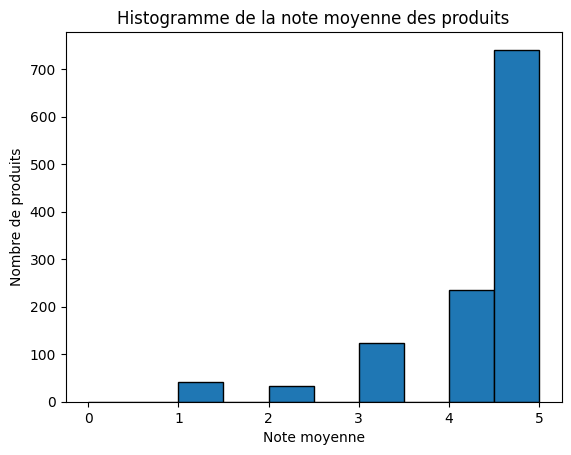

In [458]:

# Créer l'histogramme de la note moyenne
plt.hist(df_product['reviews.rating'], bins=10, range=(0, 5), edgecolor='black')

# Ajouter un titre et des labels d'axe
plt.title("Histogramme de la note moyenne des produits")
plt.xlabel("Note moyenne")
plt.ylabel("Nombre de produits")

# Afficher le graphique
plt.show()


Ce code crée un graphique à barres avec l'axe horizontal montrant si les produits sont recommandés ou non, et l'axe vertical montrant le nombre de produits dans chaque catégorie.

In [459]:
df_product['reviews.doRecommend'].value_counts()

True     1101
False      76
Name: reviews.doRecommend, dtype: int64

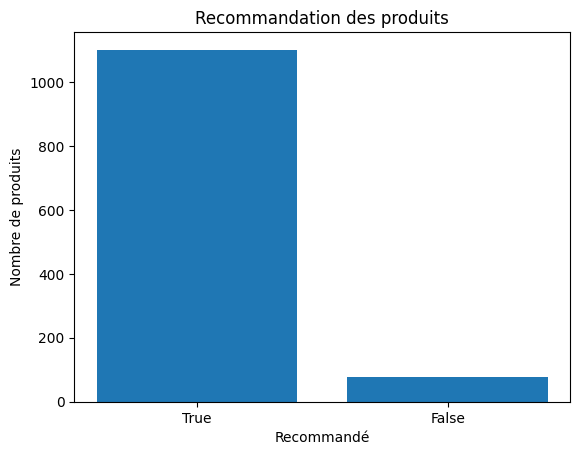

In [460]:
# Compter le nombre de produits recommandés et non recommandés
recommend_counts = df_product['reviews.doRecommend'].value_counts()

# Créer le graphique à barres
plt.bar(recommend_counts.index.astype(str), recommend_counts.values)
plt.title("Recommandation des produits")
plt.xlabel("Recommandé")
plt.ylabel("Nombre de produits")
plt.show()

Ce code crée un sous-ensemble du DataFrame avec les colonnes reviews.rating et prices.amountMax, puis supprime les lignes avec des valeurs manquantes. Ensuite, le nuage de points est créé en utilisant la méthode scatter() de Matplotlib. Enfin, des labels et un titre sont ajoutés au graphique et celui-ci est affiché avec la méthode show().

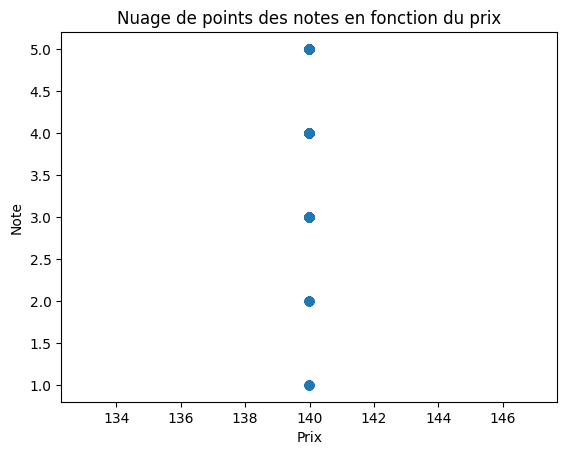

In [461]:
# Créer un sous-ensemble du DataFrame avec les colonnes reviews.rating et prices
sub_df = df_product[['reviews.rating', 'price']]

# Supprimer les lignes avec des valeurs manquantes
sub_df = sub_df.dropna()

# Créer le nuage de points
plt.scatter(sub_df['price'], sub_df['reviews.rating'])

# Ajouter des labels et des titres
plt.xlabel('Prix')
plt.ylabel('Note')
plt.title('Nuage de points des notes en fonction du prix')

# Afficher le graphique
plt.show()


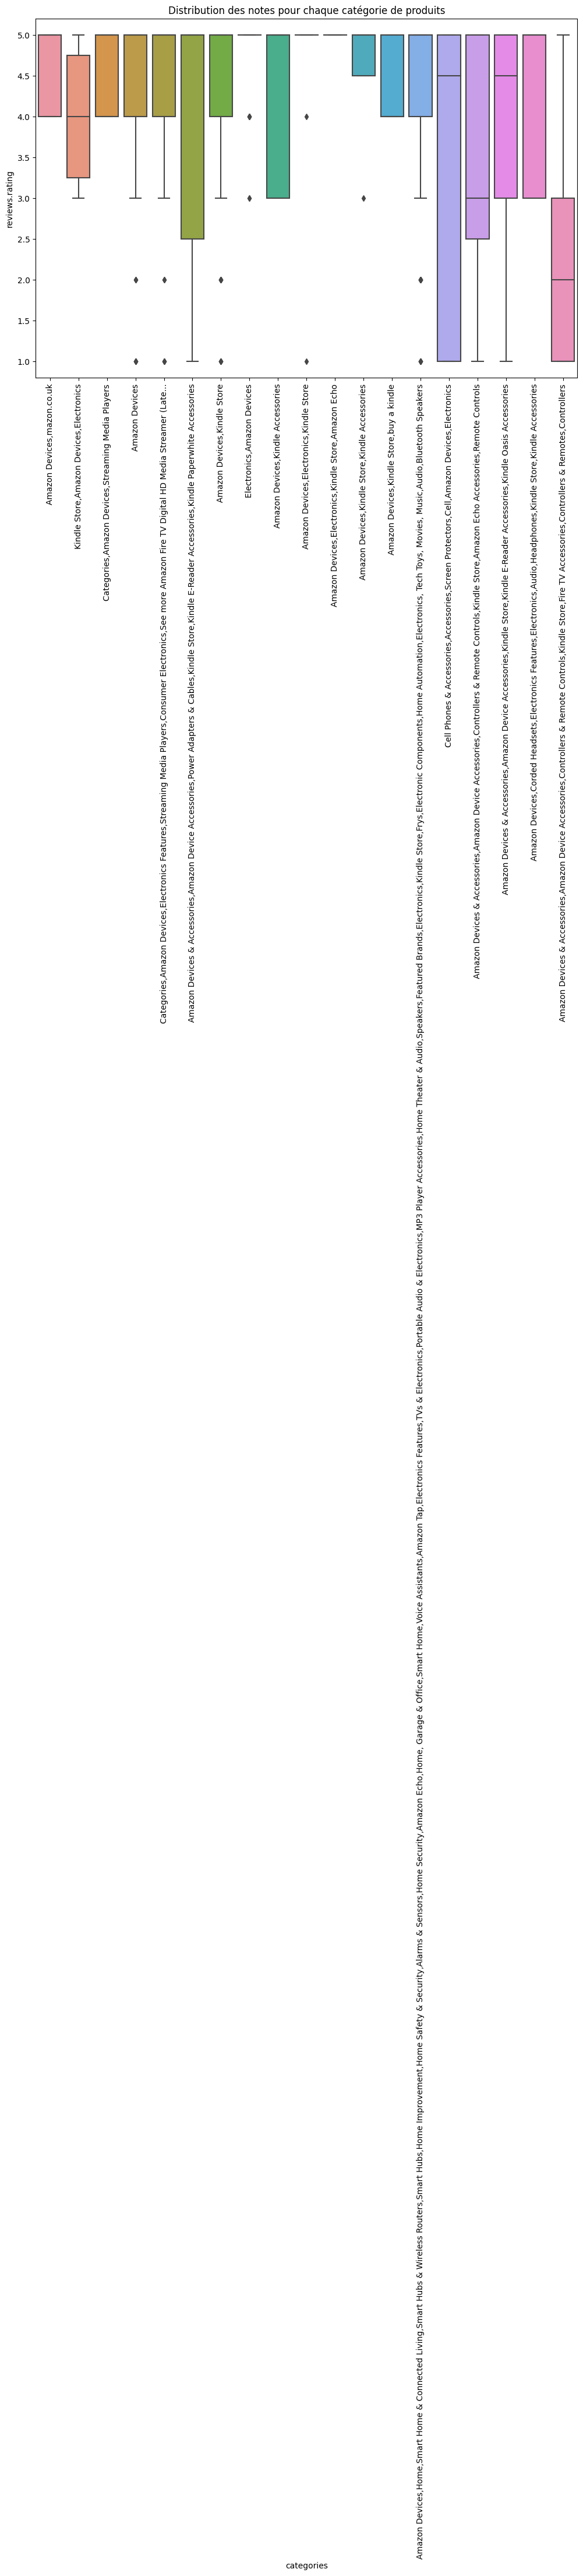

In [462]:

# Sélectionner les colonnes nécessaires
df_boxplot = df_product[['categories', 'reviews.rating']]

# Supprimer les lignes contenant des valeurs manquantes
df_boxplot = df_boxplot.dropna()

# Créer un diagramme en boîte
plt.figure(figsize=(12,8))
sns.boxplot(x='categories', y='reviews.rating', data=df_boxplot)
plt.xticks(rotation=90)
plt.title('Distribution des notes pour chaque catégorie de produits')
plt.show()


In [463]:
df_product.isna().sum()

brand                    0
categories               0
colors                   0
name                     0
reviews.date           217
reviews.doRecommend      0
reviews.numHelpful       0
reviews.rating           0
reviews.text             0
reviews.title            0
reviews.username         0
price                    0
longueur                 0
largeur                  0
hauteur                  0
weight_grams             0
dtype: int64

##### PCA #####

In [464]:
# Importer les bibliothèques nécessaires
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [465]:
# Convert categorical variables into dummy variables
df_product = pd.get_dummies(df_product, columns=['colors'])

In [466]:
df_numeric = df_product.select_dtypes(include=['int', 'float'])

In [467]:
# Sélectionner les colonnes de type uint8
df_categorical = df_product.select_dtypes(include=['uint8'])

# Ajouter les colonnes de type uint8 à la dataframe df_numeric
df_numeric = pd.concat([df_numeric, df_categorical], axis=1)

In [468]:
df_numeric.isna().sum()

reviews.numHelpful           0
reviews.rating               0
price                        0
longueur                     0
largeur                      0
hauteur                      0
weight_grams                 0
colors_Black                 0
colors_Clear                 0
colors_GB                    0
colors_coleur non précise    0
dtype: int64

In [469]:
# Normaliser les données pour éviter les biais
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

In [470]:
pca = PCA()
pca.fit(df_scaled)

PCA()

In [471]:
# Determine the number of principal components to retain
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
num_components = np.argmax(cumulative_variance > 0.95) + 1
print('Number of principal components to retain:', num_components)

Number of principal components to retain: 6


In [472]:
# Transform the data using the retained principal components
pca = PCA(n_components=num_components)
product_df_pca = pca.fit_transform(df_scaled)

In [473]:
product_df_pca

array([[ 1.65257568, -2.04989317, -0.3280097 ,  0.34572094,  1.43211422,
         1.25556944],
       [ 1.62383596, -2.04682807, -0.33535792,  0.38480503,  1.47091432,
         1.21634037],
       [ 1.6232379 , -1.68569466, -0.8294287 ,  1.15989967,  1.17287745,
         1.20458815],
       ...,
       [ 1.77133285,  1.14860137, -1.68657081,  2.20612778, -1.07294958,
        -0.07561604],
       [ 1.46081359,  0.45957919, -0.77812926,  1.07985054, -0.05604406,
        -0.47759618],
       [ 1.71827491,  1.15426003, -1.70013677,  2.27828302, -1.00131864,
        -0.14803894]])

In [474]:
df_product['reviews.doRecommend'].unique()

array([ True, False])

In [475]:
df = pd.DataFrame(product_df_pca, columns=['PC1', 'PC2', 'PC3','PC4', 'PC5', 'PC6'])

In [424]:
df['reviews.doRecommend']=df_product['reviews.doRecommend']

In [476]:
df.isna().sum()

PC1    0
PC2    0
PC3    0
PC4    0
PC5    0
PC6    0
dtype: int64

In [477]:
#knn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X = df
y = df_product['reviews.doRecommend']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the knn model with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
knn.fit(X_train, y_train)

# Make predictions
y_preds = knn.predict(X_test)

In [478]:
# Evaluate the model using accuracy metric
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_preds)
print('Accuracy:', accuracy)

Accuracy: 1.0
